In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
data = pd.read_csv("world-happiness-report.csv")
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [3]:
data_2021 = pd.read_csv("world-happiness-report-2021.csv")
data_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [4]:
data = data_2021[["Country name", "Regional indicator"]].set_index("Country name").join(data.set_index("Country name"))
data = data.reset_index(drop=False).set_index(["Regional indicator", "Country name"])
data = data.sort_index()
data

year  Life Ladder  \
Regional indicator         Country name                        
Central and Eastern Europe Albania         2007        4.634   
                           Albania         2009        5.485   
                           Albania         2010        5.269   
                           Albania         2011        5.867   
                           Albania         2012        5.510   
...                                         ...          ...   
Western Europe             United Kingdom  2016        6.824   
                           United Kingdom  2017        7.103   
                           United Kingdom  2018        7.233   
                           United Kingdom  2019        7.157   
                           United Kingdom  2020        6.798   

                                           Log GDP per capita  Social support  \
Regional indicator         Country name                                         
Central and Eastern Europe Albania                      9.142           0.821   
                           Albania                      9.262           0.833   
                           Albania                      9.303           0.733   
                           Albania                      9.331           0.759   
                           Albania                      9.347           0.785   
...                                                       ...             ...   
Western Europe             United Kingdom              10.724           0.954   
                           United Kingdom              10.736           0.937   
                           United Kingdom              10.743           0.928   
                           United Kingdom              10.751           0.943   
                           United Kingdom              10.626           0.929   

                                           Healthy life expectancy at birth  \
Regional indicator         Country name                                       
Central and Eastern Europe Albania                                    65.80   
                           Albania                                    66.20   
                           Albania                                    66.40   
                           Albania                                    66.68   
                           Albania                                    66.96   
...                                                                     ...   
Western Europe             United Kingdom                             71.90   
                           United Kingdom                             72.10   
                           United Kingdom                             72.30   
                           United Kingdom                             72.50   
                           United Kingdom                             72.70   

                                           Freedom to make life choices  \
Regional indicator         Country name                                   
Central and Eastern Europe Albania                                0.529   
                           Albania                                0.525   
                           Albania                                0.569   
                           Albania                                0.487   
                           Albania                                0.602   
...                                                                 ...   
Western Europe             United Kingdom                         0.821   
                           United Kingdom                         0.813   
                           United Kingdom                         0.838   
                           United Kingdom                         0.854   
                           United Kingdom                         0.885   

                                           Generosity  \
Regional indicator         Country name                 
Central and Eastern Europe Albania    

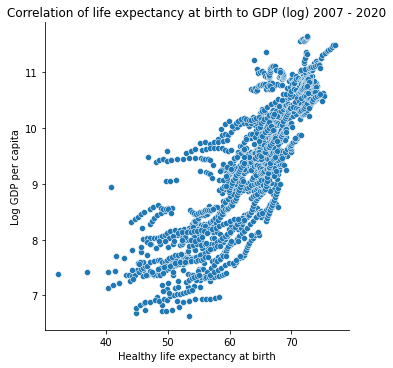

In [5]:
ax = sb.relplot(data = data, x = "Healthy life expectancy at birth", y = "Log GDP per capita")

ax.set(title = "Correlation of life expectancy at birth to GDP (log) 2007 - 2020")

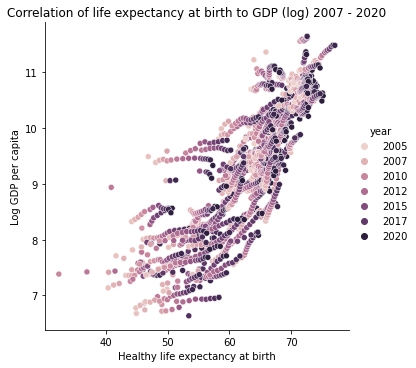

In [6]:
ax = sb.relplot(data = data, x = "Healthy life expectancy at birth", y = "Log GDP per capita",
                hue = "year")

ax.set(title = "Correlation of life expectancy at birth to GDP (log) 2007 - 2020")

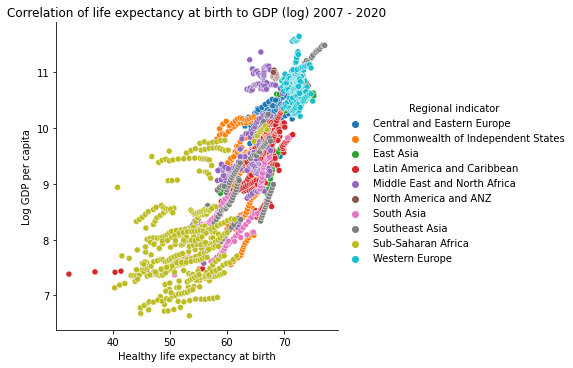

In [7]:
ax = sb.relplot(data = data, x = "Healthy life expectancy at birth", y = "Log GDP per capita", 
           hue = "Regional indicator")

ax.set(title = "Correlation of life expectancy at birth to GDP (log) 2007 - 2020")

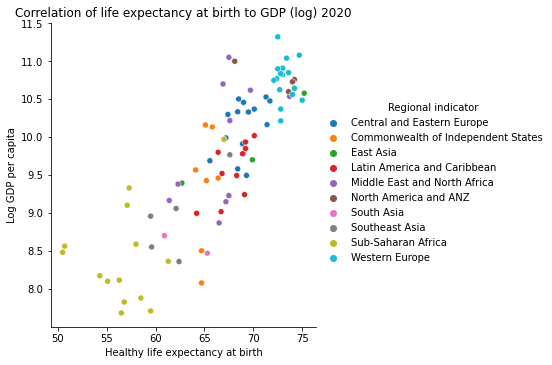

In [8]:
ax = sb.relplot(data = data[data["year"] == 2020], x = "Healthy life expectancy at birth", y = "Log GDP per capita", 
           hue = "Regional indicator")

ax.set(title = "Correlation of life expectancy at birth to GDP (log) 2020")

<IPython.core.display.Javascript object>


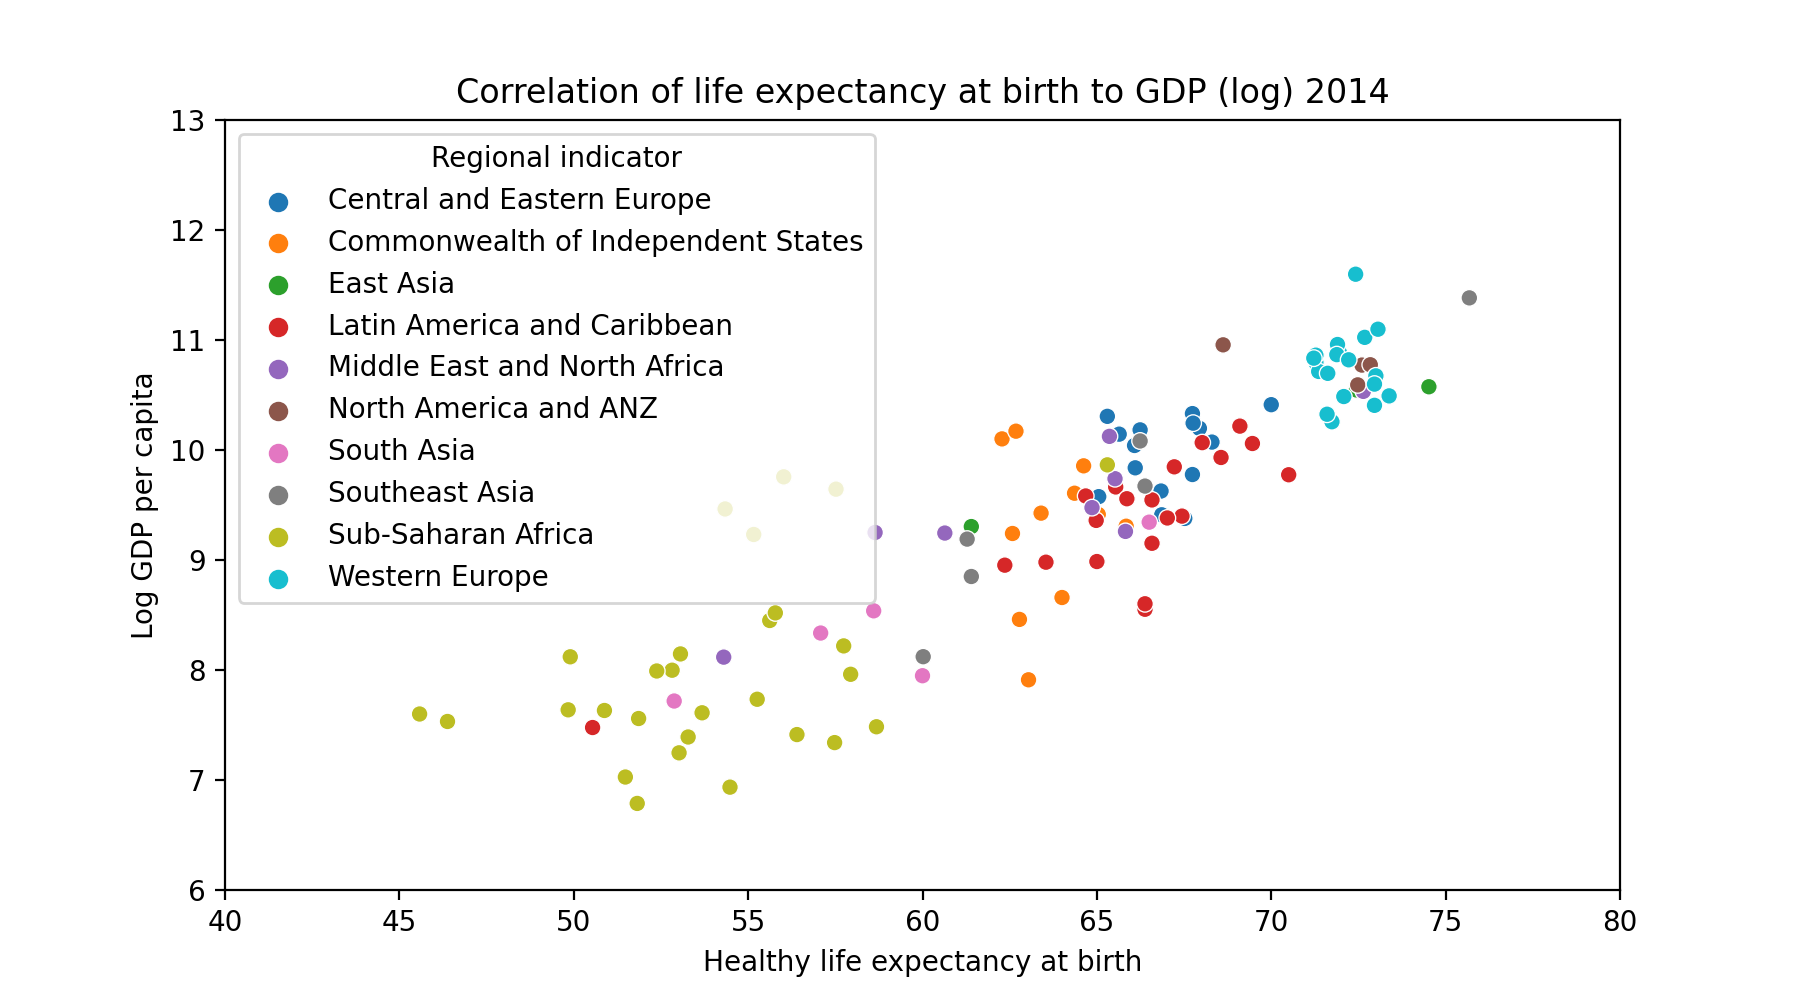

In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(9,5))

def animate(i):
    plt.clf()
    year = 2007 + i
    graph = sb.scatterplot(data = data[data["year"] == year], x = "Healthy life expectancy at birth", 
                    y = "Log GDP per capita", hue = "Regional indicator")
    graph.set(title = "Correlation of life expectancy at birth to GDP (log) " + str(year))
    graph.set(xlim = (40, 80), ylim = (6, 13))
    
ani = animation.FuncAnimation(fig, animate, frames=13, interval = 300, repeat=True)

In [10]:
writervideo = animation.FFMpegWriter(fps=5) 
ani.save("animation_lifeexpectancy_gdp.mp4", writer=writervideo)

In [11]:
population = pd.read_csv("population_by_country_2020.csv")
population = population[["Country (or dependency)", "Population (2020)"]]
population.columns = ["Country name", "Population 2020 in Millions"]
population["Population 2020 in Millions"] = population["Population 2020 in Millions"].astype(int)/1_000_000
population

,Country name,Population 2020 in Millions
0,China,1440.297825
1,India,1382.345085
2,United States,331.341050
3,Indonesia,274.021604
4,Pakistan,221.612785
...,...,...
230,Montserrat,0.004993
231,Falkland Islands,0.003497
232,Niue,0.001628
233,Tokelau,0.001360


In [12]:
data = data.reset_index(drop=False)
data = population.set_index("Country name").join(data.set_index("Country name"))
data = data.reset_index(drop=False).set_index(["Regional indicator", "Country name"])
data = data.sort_index()
data = data.dropna()
data

Population 2020 in Millions  \
Regional indicator         Country name                                  
Central and Eastern Europe Albania                            2.877239   
                           Albania                            2.877239   
                           Albania                            2.877239   
                           Albania                            2.877239   
                           Albania                            2.877239   
...                                                                ...   
Western Europe             United Kingdom                    67.948282   
                           United Kingdom                    67.948282   
                           United Kingdom                    67.948282   
                           United Kingdom                    67.948282   
                           United Kingdom                    67.948282   

                                             year  Life Ladder  \
Regional indicator         Country name                          
Central and Eastern Europe Albania         2007.0        4.634   
                           Albania         2009.0        5.485   
                           Albania         2010.0        5.269   
                           Albania         2011.0        5.867   
                           Albania         2012.0        5.510   
...                                           ...          ...   
Western Europe             United Kingdom  2016.0        6.824   
                           United Kingdom  2017.0        7.103   
                           United Kingdom  2018.0        7.233   
                           United Kingdom  2019.0        7.157   
                           United Kingdom  2020.0        6.798   

                                           Log GDP per capita  Social support  \
Regional indicator         Country name                                         
Central and Eastern Europe Albania                      9.142           0.821   
                           Albania                      9.262           0.833   
                           Albania                      9.303           0.733   
                           Albania                      9.331           0.759   
                           Albania                      9.347           0.785   
...                                                       ...             ...   
Western Europe             United Kingdom              10.724           0.954   
                           United Kingdom              10.736           0.937   
                           United Kingdom              10.743           0.928   
                           United Kingdom              10.751           0.943   
                           United Kingdom              10.626           0.929   

                                           Healthy life expectancy at birth  \
Regional indicator         Country name                                       
Central and Eastern Europe Albania                                    65.80   
                           Albania                                    66.20   
                           Albania                                    66.40   
                           Albania                                    66.68   
                           Albania                                    66.96   
...                                                                     ...   
Western Europe             United Kingdom                             71.90   
                           United Kingdom                             72.10   
                           United Kingdom                             72.30   
                           United Kingdom                             72.50   
                           United Kingdom                             72.70   

                                           Freedom to make life choices  \
Regional indicator         Country name                         

<Figure size 936x576 with 0 Axes>

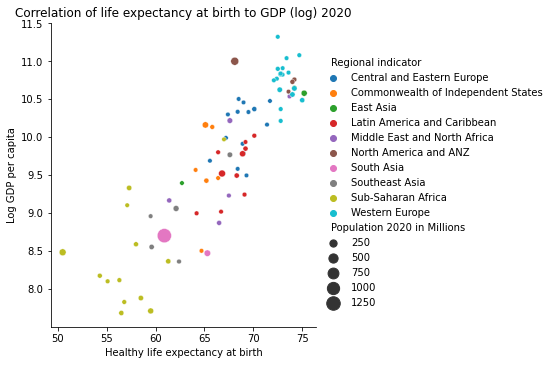

In [13]:
%matplotlib inline
plt.figure(figsize=(13,8))
graph = sb.relplot(data = data[data["year"] == 2020], x = "Healthy life expectancy at birth", 
                       y = "Log GDP per capita", size = "Population 2020 in Millions", 
                       hue = "Regional indicator", sizes=(20, 200))
graph.set(title = "Correlation of life expectancy at birth to GDP (log) 2020")